# Californian Housing Market




In Sklearn, there are datasets that are already pre-recorded that we can use for our purposes to apply Machine Learning algorithms. Let's try to look at the first one with Boston Housing Market.

1. Import usual librairies

In [113]:
import sklearn
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import f_regression
from sklearn.preprocessing import  OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.pipeline import Pipeline

    2. Use the following lines of code to retrieve California real estate price data:
    
```
from sklearn import datasets
data = datasets.california_housing.fetch_california_housing()
```

In [81]:
from sklearn import datasets
X, y = datasets.fetch_california_housing(return_X_y = True, as_frame=True)

3. Use ONE line of code to get the names of the different explanatory variables.

In [82]:
X.columns.to_list()

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

4. We'd prefer to have this data in a DataFrame. Use the Pandas library to find a way to put this data into a DataFrame. 

You can go more specifically look at the following link: 

[DataFrame en Pandas](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html)

In [83]:
df = pd.concat([X, y], axis=1)
display(df)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


5. Visualize the impact of each variable on price with Seaborn 

a. Make a point cloud to express _Price_ as a function of _MedInc_.

<AxesSubplot:xlabel='MedInc', ylabel='MedHouseVal'>

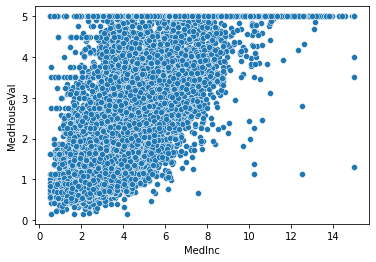

In [84]:
sns.scatterplot(data=df, x="MedInc", y="MedHouseVal")

b. Now look at the influence of the age of the house in relation to the price.

<AxesSubplot:xlabel='HouseAge', ylabel='MedHouseVal'>

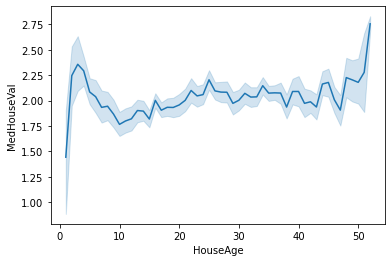

In [85]:
sns.lineplot(data=df, x="HouseAge", y="MedHouseVal")

c. Find a way to look at the trend between _AveRooms_ & _Price_.

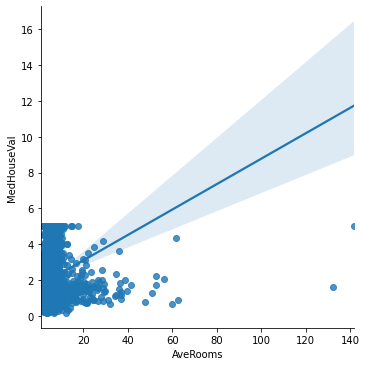

In [86]:
sns.lmplot(data=df, x="AveRooms", y="MedHouseVal")

d. Do the same with _AveBedrms_ & _Price_.

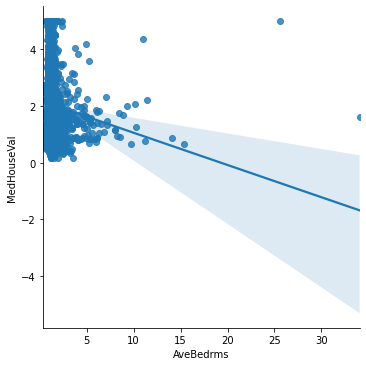

In [87]:
sns.lmplot(data=df, x="AveBedrms", y="MedHouseVal")

e. Do the same with the population. Simply filter the dataset so that it contains only those values for which the population is less than 15,000.

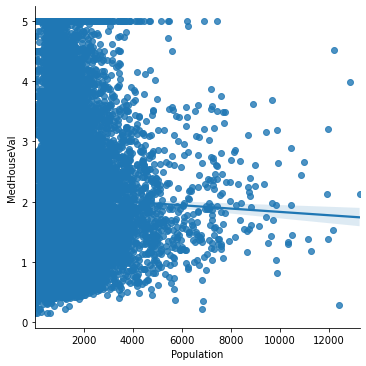

In [89]:
sns.lmplot(data=df.loc[df["Population"] < 15000, :], x="Population", y="MedHouseVal")

f. Do the same with _AveOccup_. This time filter the column to keep only the values below 100%.

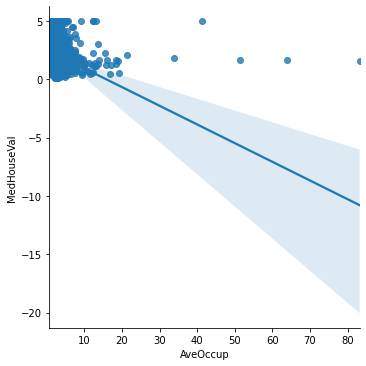

In [90]:
sns.lmplot(data=df.loc[df["AveOccup"] < 100, :], x="AveOccup", y="MedHouseVal")

6. Cut your dataset in half. You will have $X$ containing the explanatory variables and $y$ containing the target variable.

7. Now separate your dataset into a *train_set* and a *test_set*. We will use scikitlearn for this

In [91]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=0)

8. In your opinion, is there a need for a standardisation phase? If so, do it via scikitlearn.

In [92]:
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, X.columns),
    ])

X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

In [95]:
Y_train

12069    5.00001
15925    2.70000
11162    1.96100
4904     1.18800
4683     2.25000
          ...   
13123    1.44600
19648    1.59400
9845     2.89300
10799    4.84600
2732     0.69400
Name: MedHouseVal, Length: 16512, dtype: float64

9. Create your linear regression model via scikit learn

In [98]:
model = LinearRegression()

print("Training model...")
model.fit(X_train, Y_train) # Training is always done on train set !!
print("...Done.")

Y_test_pred = model.predict(X_test)

Training model...
...Done.


10. Display your R2 score via scikitlearn on your test data. Comment on your score results.

In [99]:
print("R2 score on test set : ", r2_score(Y_test, Y_test_pred))

R2 score on test set :  0.5943232652466204


11. Display the coefficients of each of the explanatory variables 

In [100]:
model.coef_

array([ 0.82624793,  0.1171006 , -0.24891059,  0.29038746, -0.00864349,
       -0.03056429, -0.90042112, -0.87058566])

12. Create a DataFrame in which you will have the columns that refer to the right coefficient

In [166]:
coefficients = pd.DataFrame(index=X.columns, data=model.coef_, columns=["coefficients"])
coefficients

,coefficients
MedInc,0.826248
HouseAge,0.117101
AveRooms,-0.248911
AveBedrms,0.290387
Population,-0.008643
AveOccup,-0.030564
Latitude,-0.900421
Longitude,-0.870586


13. Order this dataset in descending order. What can you conclude now? 

In [167]:
coefficients.apply(lambda x: abs(x)).sort_values(by=["coefficients"], ascending=False)

,coefficients
Latitude,0.900421
Longitude,0.870586
MedInc,0.826248
AveBedrms,0.290387
AveRooms,0.248911
HouseAge,0.117101
AveOccup,0.030564
Population,0.008643


---> The most influential columns are MedInc, Longitude & Latitude and the number of beds.

14. In general, one avoids looking at the coefficients to determine the importance of features. Instead, we'll use something other than "f_regression".

Look at the documentation of sckitlearn to try to succeed in setting up this metric.

In [116]:
features = f_regression(X_train, Y_train)
features

(array([1.52347577e+04, 1.89301566e+02, 4.03339615e+02, 3.26341919e+01,
        1.20923205e+01, 1.81838098e+01, 3.43198328e+02, 3.69846043e+01]),
 array([0.00000000e+00, 7.78267057e-43, 1.18008720e-88, 1.13156847e-08,
        5.07602237e-04, 2.01691610e-05, 7.53034411e-76, 1.21688367e-09]))

In [127]:
np.concatenate(features)

array([1.52347577e+04, 1.89301566e+02, 4.03339615e+02, 3.26341919e+01,
       1.20923205e+01, 1.81838098e+01, 3.43198328e+02, 3.69846043e+01,
       0.00000000e+00, 7.78267057e-43, 1.18008720e-88, 1.13156847e-08,
       5.07602237e-04, 2.01691610e-05, 7.53034411e-76, 1.21688367e-09])

15. Then put your results in a dataframe so that they can be interpreted.

In [133]:
f_score, p_value = features
coefficients = pd.DataFrame(index=X.columns, data={'f-core':f_score, 'p-alue':p_value}).sort_values(by = ['f-core'], ascending=False)
coefficients

,f-core,p-alue
MedInc,15234.757671,0.000000e+00
AveRooms,403.339615,1.180087e-88
Latitude,343.198328,7.530344e-76
HouseAge,189.301566,7.782671e-43
Longitude,36.984604,1.216884e-09
AveBedrms,32.634192,1.131568e-08
AveOccup,18.183810,2.016916e-05
Population,12.092320,5.076022e-04


<AxesSubplot:xlabel='f-core'>

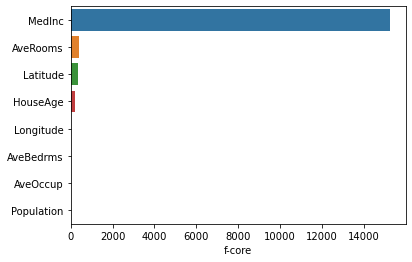

In [134]:
sns.barplot(data=coefficients, x="f-core", y=coefficients.index)

---> Here we see that the ranking of the features is slightly different. It is on this f-score that we will rely for the rest of the exercises.

**Additional questions**

16. Take a sample from your dataset via ``.sample()`` We will take 150 values

In [153]:
df.sample(150)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
14976,4.3714,23.0,6.202673,1.042316,1456.0,3.242762,32.70,-117.00,1.310
3844,2.0192,22.0,3.528752,1.158485,3350.0,4.698457,34.18,-118.45,1.583
243,3.0536,49.0,3.665306,0.995918,779.0,3.179592,37.78,-122.21,1.375
18675,6.0281,18.0,6.538066,1.131687,2304.0,2.370370,36.96,-121.88,3.211
13969,2.4308,18.0,9.625344,2.252066,2044.0,2.815427,34.26,-116.85,0.906
...,...,...,...,...,...,...,...,...,...
18014,5.2533,22.0,5.257094,1.041273,2983.0,2.564918,37.27,-121.96,2.691
2416,1.8975,36.0,5.052863,1.077093,1430.0,3.149780,36.60,-119.45,0.609
7642,4.4015,36.0,4.978125,1.043750,1427.0,4.459375,33.82,-118.27,1.669
3639,3.8083,41.0,4.618834,0.959641,664.0,2.977578,34.22,-118.44,1.838


17. Reset the indexes to have a sequence of numbers between 0 and the size of the dataset.

In [154]:
sample = df.sample(150).reset_index(drop=True)
sample

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,2.0043,36.0,5.264151,1.326146,999.0,2.692722,37.97,-121.33,0.90800
1,10.3983,31.0,7.888889,1.200617,1530.0,2.361111,33.49,-117.73,5.00001
2,1.0278,15.0,3.693252,1.000000,543.0,1.665644,32.76,-117.02,1.54200
3,1.6232,7.0,4.993464,1.144880,2049.0,2.232026,34.49,-117.32,0.93400
4,2.0260,50.0,3.700658,1.059211,616.0,2.026316,37.83,-122.26,1.42500
...,...,...,...,...,...,...,...,...,...
145,2.4250,52.0,5.590805,1.137931,928.0,2.133333,39.22,-121.07,1.21100
146,4.0230,14.0,5.594737,1.091579,2228.0,2.345263,38.42,-122.66,2.08400
147,4.3783,16.0,6.028612,1.064378,1820.0,2.603720,32.83,-117.10,1.79500
148,5.0869,23.0,6.419540,1.132184,1535.0,2.940613,34.02,-117.80,2.30600


18. Use the following help to translate the longitude and latitude of the data to find the cities corresponding to each observation: [geopy](https://pypi.org/project/geopy)

In [139]:
!pip install geopy

     |████████████████████████████████| 112 kB 7.8 MB/s eta 0:00:01


In [155]:
from geopy.geocoders import Nominatim

geolocator = Nominatim(user_agent="thibaud_jedha")
sample["City"] = sample.apply(lambda row: geolocator.reverse((row['Latitude'], row['Longitude'])).raw["address"].get('city', 'unknown'), axis=1)

19. Trouvez le top 10 des villes qui ont les prix moyens les plus chers

In [157]:
top_cities = sample.groupby("City").mean().sort_values(by=["MedHouseVal"], ascending=False).head(10)
top_cities

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
City,,,,,,,,,
Palo Alto,7.541800,52.00,5.675000,1.095000,441.00,2.205000,37.450,-122.160,4.920000
Torrance,6.855300,33.00,6.760695,1.056150,2021.00,2.701872,33.810,-118.370,4.822000
Costa Mesa,6.632000,27.00,5.879218,1.062167,1402.00,2.490231,33.650,-117.900,4.411000
San Francisco,4.634960,44.80,4.861835,1.066974,1562.60,2.410587,37.770,-122.440,4.149404
Irvine,7.106900,16.00,7.683636,1.044848,3132.00,3.796364,33.710,-117.790,3.134000
Thousand Oaks,7.558950,20.50,7.761729,1.038819,913.00,3.188140,34.160,-118.885,3.128000
Mountain View,5.806000,25.00,5.485893,1.068966,999.00,3.131661,37.400,-122.080,3.087000
San Rafael,4.200600,33.00,5.047866,1.101644,2031.50,2.131788,37.995,-122.545,2.726500
San Diego,4.320675,19.25,5.168952,1.014201,1665.75,2.580550,32.845,-117.135,2.601752


20. Display this in a graph 

<AxesSubplot:xlabel='City', ylabel='MedHouseVal'>

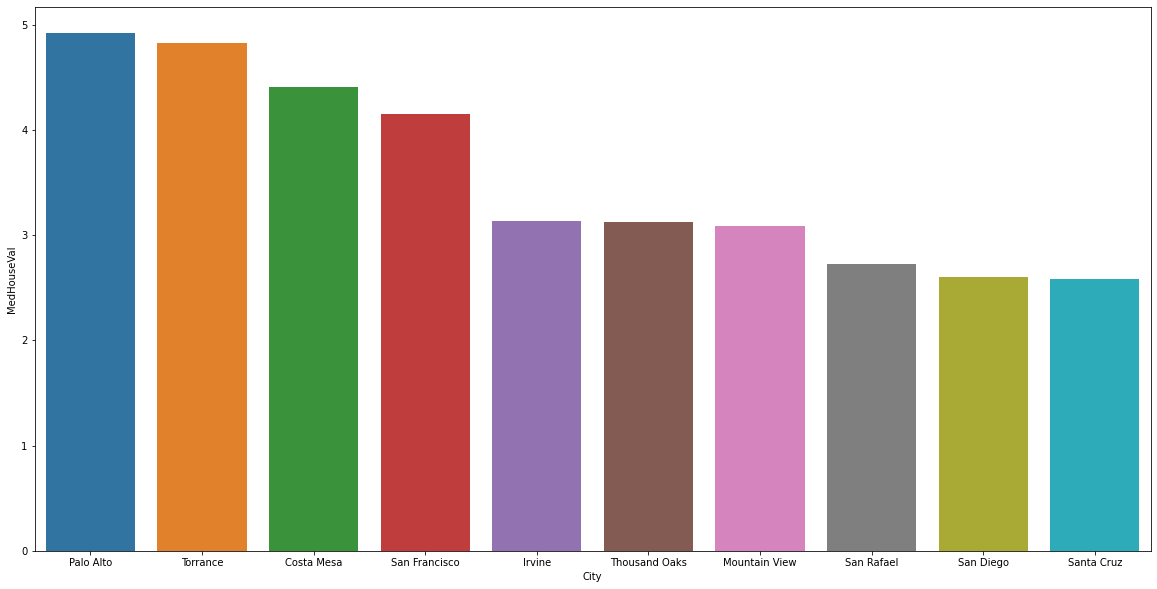

In [164]:
from matplotlib import pyplot as plt

fig_dims = (20, 10)
fig, ax = plt.subplots(figsize=fig_dims)
sns.barplot(data=top_cities, x=top_cities.index, y="MedHouseVal", ax=ax)

21. Redo a linear regression model by including cities as explanatory variables. What score do you find?

In [179]:
target_variable = "MedHouseVal"

X = sample.loc[:, [column for column in sample if column != target_variable]]
y = sample.loc[:, [target_variable]]

In [183]:
numeric_features = ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_features = ['City'] # Positions of categorical columns in X_train/X_test
categorical_transformer = Pipeline(
    steps=[
    ('encoder', OneHotEncoder(drop='first')) # first column will be dropped to avoid creating correlations between features
    ])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

X = preprocessor.fit_transform(X)

X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [184]:
model = LinearRegression()

print("Training model...")
model.fit(X_train, Y_train) # Training is always done on train set !!
print("...Done.")

Y_test_pred = model.predict(X_test)

Training model...
...Done.


In [185]:
print("R2 score on test set : ", r2_score(Y_test, Y_test_pred))

R2 score on test set :  0.6700443887251645


22. Our model is generally not as good. Why do you think that is? 

----> We have much less data. We'd have to take a bigger sample for our model to have enough to train properly. 